2. House prices model
In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
Do you think your model is satisfactory? If so, why?
In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables.
For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
table_name = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [3]:
Y = houses_df['saleprice']
X = houses_df[['overallqual','grlivarea', 'garagecars', 'lotarea']]

X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1084.
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:00:31   Log-Likelihood:                -17536.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1455   BIC:                         3.511e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.032e+05   4788.762    -21.549      

It's a decent starting point, but I'll try adding in some other features below.

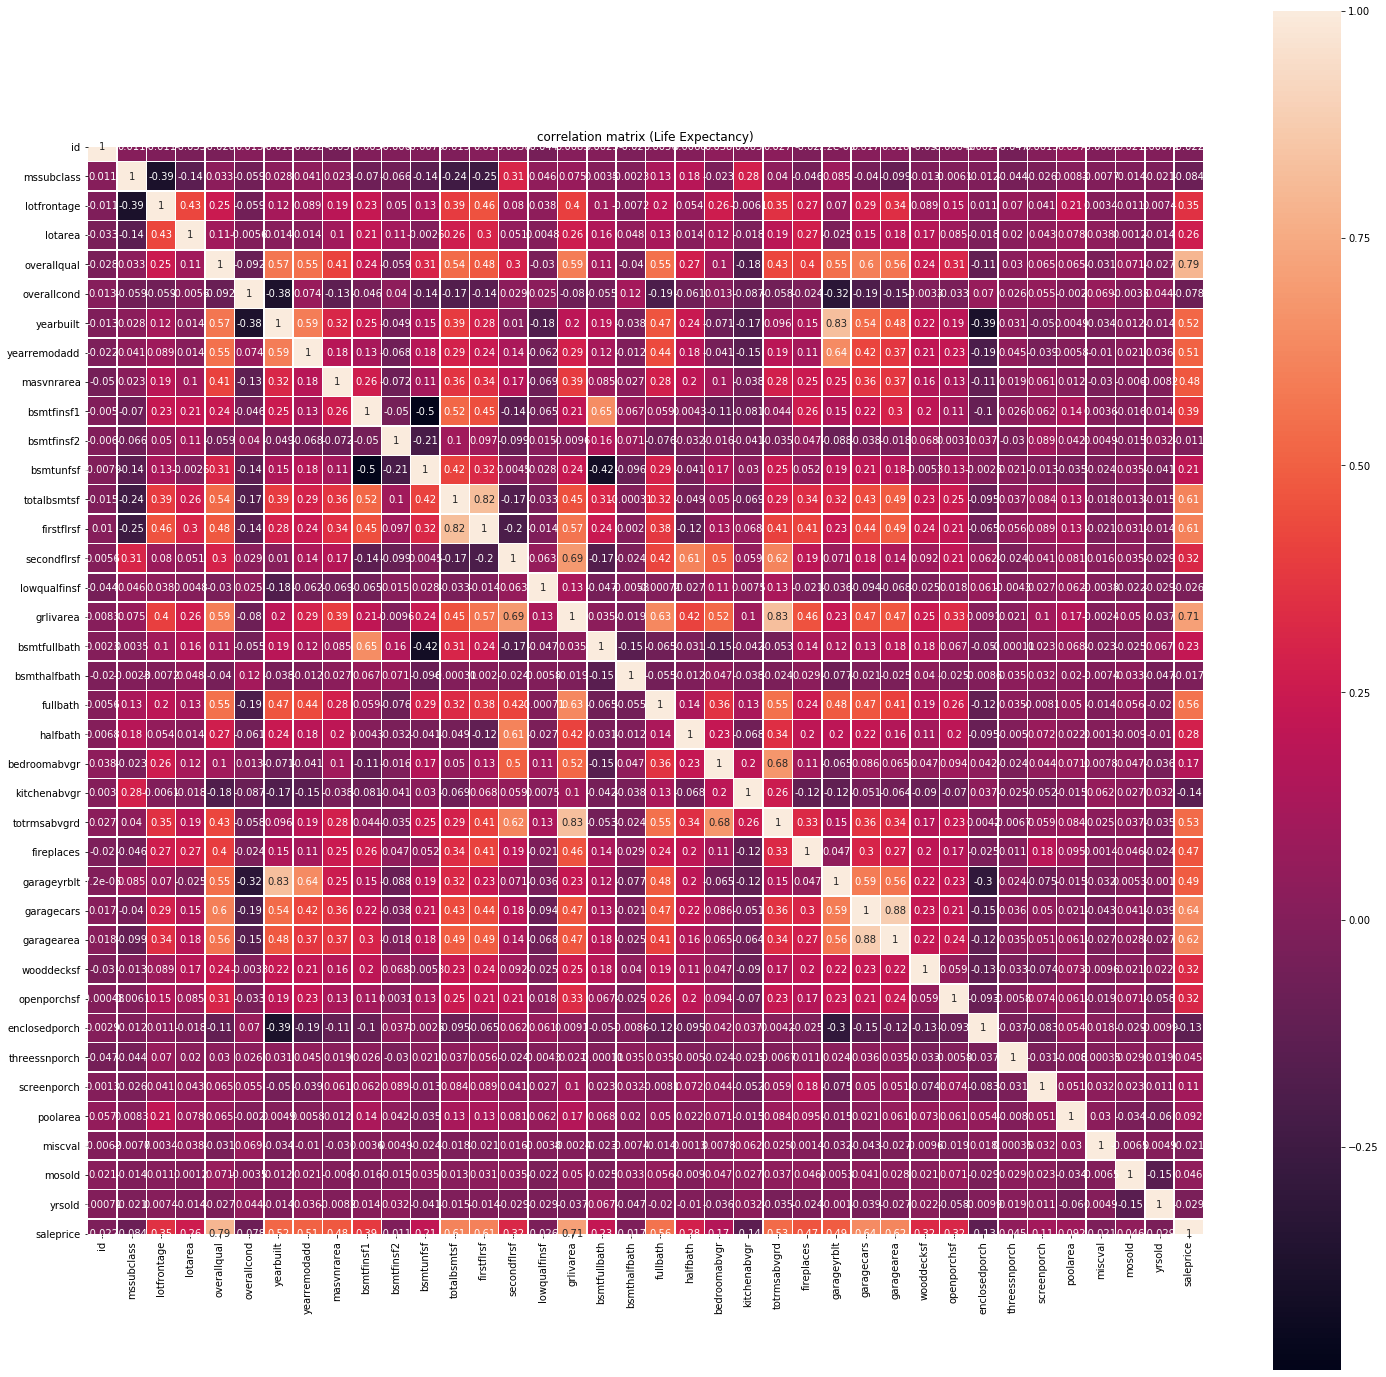

In [4]:
houses_corr = houses_df.corr()

plt.figure(figsize=(25,25))
sns.heatmap(houses_corr, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Life Expectancy)")
plt.show()

In [11]:
Y = houses_df['saleprice']
X = houses_df[['overallqual','grlivarea', 'garagecars', 'lotarea', 'yearbuilt', 'fullbath', 'wooddecksf']]

X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     677.8
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:11:25   Log-Likelihood:                -17485.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1452   BIC:                         3.503e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.518e+05   9.06e+04     -9.397      

After trying a number of different features this latest model is the best one I've got. What's odd though is that the full bath coefficient is sizeably negative. I would have thought increasing numbers of bathrooms would increase the sale price. 